In [1]:
import math, os, cv2, random, h5py
from matplotlib import pyplot as plt
from IPython.display import display
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
from skimage.transform import resize
from skimage.feature import hog

In [2]:
root_fer = ".\\generated_data"

# Visualization

## Dataframes

In [6]:
train_images_df = pd.read_csv(os.path.join(root_fer, 'chosen_train_df_rgb.csv'))
columns = train_images_df.columns.values
columns

array(['Unnamed: 0', 'imagename', 'red', 'green', 'blue', 'aro', 'val',
       'exp'], dtype=object)

In [7]:
train_images_df = train_images_df.drop(['Unnamed: 0', 'imagename'], axis=1)
train_images_df

,red,green,blue,aro,val,exp
0,116,118,104,0.577804,0.338713,3
1,119,106,198,0.806934,-0.483164,6
2,249,248,200,-0.034569,-0.002161,0
3,170,156,147,0.769841,-0.626984,5
4,250,250,250,0.714286,0.238095,3
...,...,...,...,...,...,...
3835,181,188,198,0.253968,-0.500000,6
3836,108,75,94,-0.007937,0.007937,0
3837,179,169,159,0.658149,-0.658149,7
3838,230,144,97,0.524749,-0.806704,5


In [8]:
train_images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   red     3840 non-null   int64  
 1   green   3840 non-null   int64  
 2   blue    3840 non-null   int64  
 3   aro     3840 non-null   float64
 4   val     3840 non-null   float64
 5   exp     3840 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 180.1 KB


In [9]:
train_images_df2 = train_images_df.copy()
expressions_dict = {0: 'Neutral', 1: 'Happiness', 2: 'Sadness', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Anger', 7: 'Contempt'}
train_images_df2['emo'] = train_images_df2['exp'].map(expressions_dict)
train_images_df2 = train_images_df2.drop(['exp', 'red', 'green', 'blue'], axis=1)
train_images_df2

,aro,val,emo
0,0.577804,0.338713,Surprise
1,0.806934,-0.483164,Anger
2,-0.034569,-0.002161,Neutral
3,0.769841,-0.626984,Disgust
4,0.714286,0.238095,Surprise
...,...,...,...
3835,0.253968,-0.500000,Anger
3836,-0.007937,0.007937,Neutral
3837,0.658149,-0.658149,Contempt
3838,0.524749,-0.806704,Disgust


In [10]:
train_images_df3 = pd.melt(train_images_df2, id_vars='emo', value_vars=['aro', 'val'])
train_images_df3

,emo,variable,value
0,Surprise,aro,0.577804
1,Anger,aro,0.806934
2,Neutral,aro,-0.034569
3,Disgust,aro,0.769841
4,Surprise,aro,0.714286
...,...,...,...
7675,Anger,val,-0.500000
7676,Neutral,val,0.007937
7677,Contempt,val,-0.658149
7678,Disgust,val,-0.806704


In [11]:
neutral_df = train_images_df2.loc[train_images_df2['emo'] == 'Neutral']
happiness_df = train_images_df2.loc[train_images_df2['emo'] == 'Happiness']
sadness_df = train_images_df2.loc[train_images_df2['emo'] == 'Sadness']
surprise_df = train_images_df2.loc[train_images_df2['emo'] == 'Surprise']
fear_df = train_images_df2.loc[train_images_df2['emo'] == 'Fear']
disgust_df = train_images_df2.loc[train_images_df2['emo'] == 'Disgust']
anger_df = train_images_df2.loc[train_images_df2['emo'] == 'Anger']
contempt_df = train_images_df2.loc[train_images_df2['emo'] == 'Contempt']

## Overall visualization

### Heatmap/ correlation

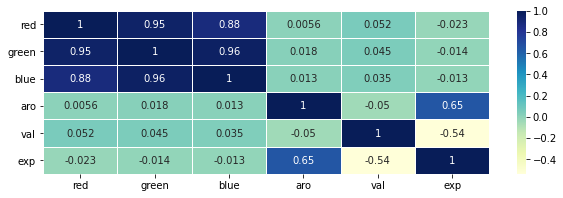

In [12]:
fig = plt.figure(figsize = (10,3))
sns.heatmap(train_images_df.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.show()

### Histogram plots

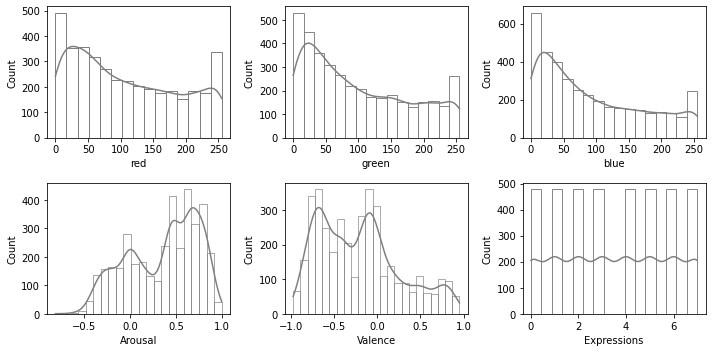

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
sns.histplot(train_images_df['red'], ax=axes[0, 0], kde=True, fill=False, color='grey')
sns.histplot(train_images_df['green'], ax=axes[0, 1], kde=True, fill=False, color='grey')
sns.histplot(train_images_df['blue'], ax=axes[0, 2], kde=True, fill=False, color='grey')
axaro = sns.histplot(train_images_df['aro'], ax=axes[1, 0], kde=True, fill=False, color='grey')
axval = sns.histplot(train_images_df['val'], ax=axes[1, 1], kde=True, fill=False, color='grey')
axexp = sns.histplot(train_images_df['exp'], ax=axes[1, 2], kde=True, fill=False, color='grey')
fig.tight_layout()
axaro.set(xlabel='Arousal')
axval.set(xlabel='Valence')
axexp.set(xlabel='Expressions')
plt.show()

### Pairgrid

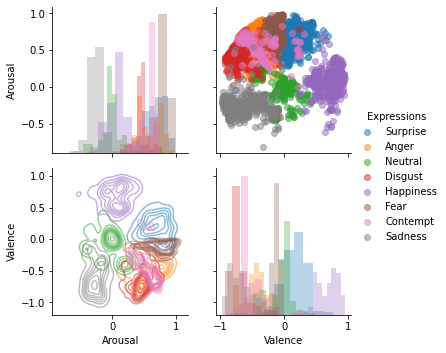

In [13]:
g = sns.PairGrid(train_images_df2, hue="emo")
g.map_diag(plt.hist, alpha=0.3)
g.map_upper(plt.scatter, alpha=0.5).add_legend()
g.map_lower(sns.kdeplot, alpha=0.5)
# Rename the axes labels
g.fig.axes[2].set_xlabel("Arousal")
g.fig.axes[2].set_ylabel("Valence")
g.fig.axes[0].set_ylabel("Arousal")
g.fig.axes[3].set_xlabel("Valence")
# Change the legend title
g._legend.set_title("Expressions")
plt.show()

### Boxplot by expression

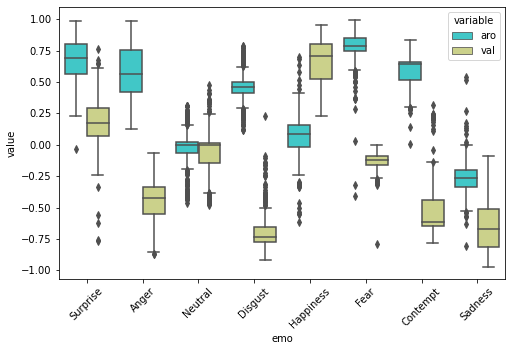

In [15]:
fig = plt.figure(figsize = (8,5))
ax = sns.boxplot(data=train_images_df3, x="emo", y="value", palette='rainbow', hue='variable')
ax.tick_params(axis='x', rotation=45)

## Visualization per each expression

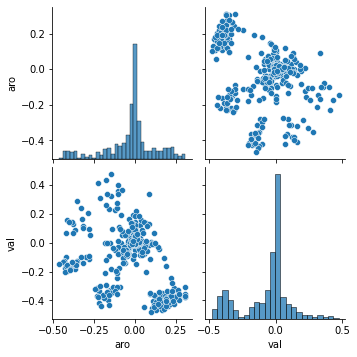

In [16]:
sns.pairplot(neutral_df)

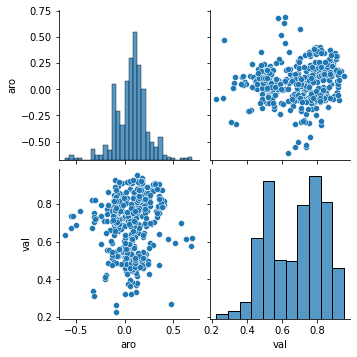

In [17]:
sns.pairplot(happiness_df)

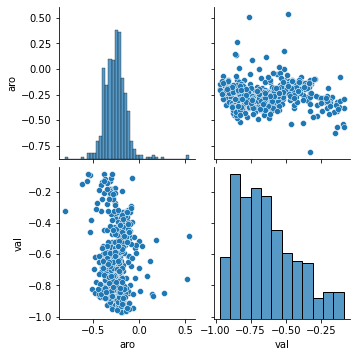

In [18]:
sns.pairplot(sadness_df)

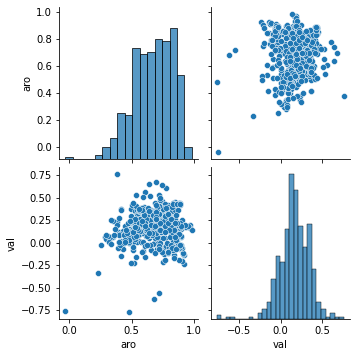

In [19]:
sns.pairplot(surprise_df)

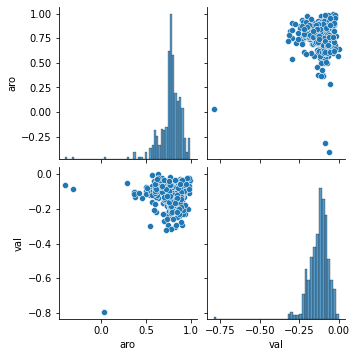

In [20]:
sns.pairplot(fear_df)

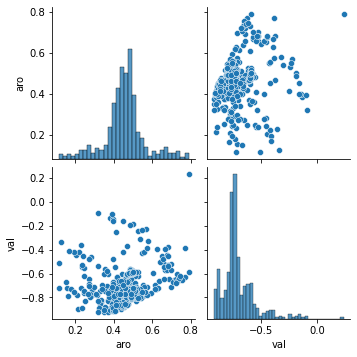

In [21]:
sns.pairplot(disgust_df)

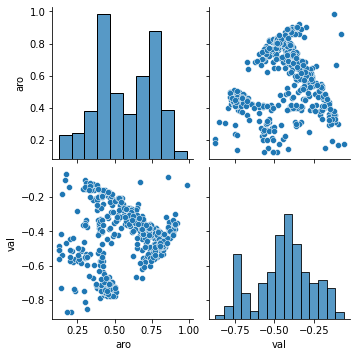

In [22]:
sns.pairplot(anger_df)

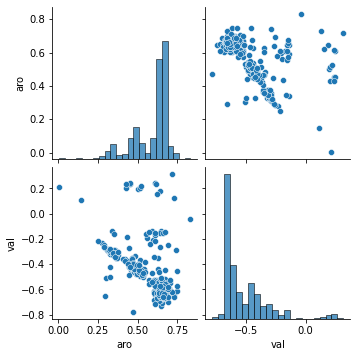

In [23]:
sns.pairplot(contempt_df)